## Dataset generation from Road Accidents STATS19 dataset 

<font color="orange">This script was used to generate dataset by removing redundant variables, imputing missing values and deriving new variables</font>

#### Load packages

In [1]:
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from geopy.distance import great_circle
from geopy.distance import vincenty
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
import warnings

#### Load data

In [2]:
wd = "C://MEJ//Data//"
os.chdir(wd)
csvDataTest = pd.read_csv("Full_20102015.csv")
startTime = datetime.now()
del wd

C:\Users\Mithu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data wrangling

##### Missing data imputation (with mean, median and mode)

In [3]:
nanDatasetTest = pd.DataFrame(csvDataTest.applymap(lambda x: np.nan if str(x) == '-1' else x))
nanDatasetTest.Sex_of_Driver.apply(lambda x: np.nan if str(x) == '3' else x)
nanDatasetTest.Journey_Purpose_of_Driver.apply(lambda x: np.nan if str(x) in ['5','6','15'] else x)
nanDatasetTest.Weather_Conditions.apply(lambda x: np.nan if str(x) == '9' else x)
nanDatasetTest.columns
nanRemovedDatasetTest = nanDatasetTest.copy(deep=True)
nanRemovedDatasetTest = nanRemovedDatasetTest.drop(['Vehicle_IMD_Decile','Driver_IMD_Decile','Junction_Control','2nd_Road_Class',
                                           'Engine_Capacity_(CC)','Propulsion_Code','Age_of_Vehicle','Driver_Home_Area_Type'],
                                           axis=1)
nanRemovedDatasetTest['Vehicle_Type'].fillna((nanRemovedDatasetTest['Vehicle_Type'].mean()), inplace=True)
nanRemovedDatasetTest['Towing_and_Articulation'].fillna((nanRemovedDatasetTest['Towing_and_Articulation'].mode()), inplace=True)
nanRemovedDatasetTest['Vehicle_Manoeuvre'].fillna((nanRemovedDatasetTest['Vehicle_Manoeuvre'].median()), inplace=True)
nanRemovedDatasetTest['Vehicle_Location-Restricted_Lane'].fillna((nanRemovedDatasetTest['Vehicle_Location-Restricted_Lane'].mode()), inplace=True)
nanRemovedDatasetTest['Junction_Location'].fillna((nanRemovedDatasetTest['Junction_Location'].median()), inplace=True)
nanRemovedDatasetTest['Skidding_and_Overturning'].fillna((nanRemovedDatasetTest['Skidding_and_Overturning'].mode()), inplace=True)
nanRemovedDatasetTest['Hit_Object_in_Carriageway'].fillna((nanRemovedDatasetTest['Hit_Object_in_Carriageway'].median()), inplace=True)
nanRemovedDatasetTest['1st_Point_of_Impact'].fillna((nanRemovedDatasetTest['1st_Point_of_Impact'].median()), inplace=True)
nanRemovedDatasetTest['Was_Vehicle_Left_Hand_Drive?'].fillna((nanRemovedDatasetTest['Was_Vehicle_Left_Hand_Drive?'].median()), inplace=True)
#imp = Imputer(missing_values='NaN', strategy='median', axis=0,copy=False)
#imp.fit_transform(nanRemovedDatasetTest)
nanRemovedDatasetTest['Journey_Purpose_of_Driver'].fillna((nanRemovedDatasetTest['Journey_Purpose_of_Driver'].median()), inplace=True)
nanRemovedDatasetTest['Sex_of_Driver'].fillna((nanRemovedDatasetTest['Sex_of_Driver'].mode()), inplace=True)
nanRemovedDatasetTest['Age_Band_of_Driver'].fillna((nanRemovedDatasetTest['Age_Band_of_Driver'].median()), inplace=True)
nanRemovedDatasetTest['Age_of_Driver'].fillna((nanRemovedDatasetTest['Age_of_Driver'].median()), inplace=True)
nanRemovedDatasetTest['Pedestrian_Crossing-Human_Control'].fillna((nanRemovedDatasetTest['Pedestrian_Crossing-Human_Control'].median()), inplace=True)
nanRemovedDatasetTest['Pedestrian_Crossing-Physical_Facilities'].fillna((nanRemovedDatasetTest['Pedestrian_Crossing-Physical_Facilities'].median()), inplace=True)
nanRemovedDatasetTest['Weather_Conditions'].fillna((nanRemovedDatasetTest['Weather_Conditions'].mode()), inplace=True)
nanRemovedDatasetTest['Road_Surface_Conditions'].fillna((nanRemovedDatasetTest['Road_Surface_Conditions'].median()), inplace=True)
nanRemovedDatasetTest['Special_Conditions_at_Site'].fillna((nanRemovedDatasetTest['Special_Conditions_at_Site'].mode()), inplace=True)
nanRemovedDatasetTest['Carriageway_Hazards'].fillna((nanRemovedDatasetTest['Carriageway_Hazards'].mode()), inplace=True)
nanRemovedDatasetTest.drop(['Location_Easting_OSGR','Location_Northing_OSGR','Did_Police_Officer_Attend_Scene_of_Accident',
                        'DateTime_Out','Police_Force', '2nd_Road_Number'],
                       axis = 1, inplace = True)

In [4]:
nanRemovedDatasetTest.rename(columns = {'Local_Authority_(District)':'Local_Authority_District',
                       'Local_Authority_(Highway)':'Local_Authority_Highway',
                      'Was_Vehicle_Left_Hand_Drive?':'Vehicle_Left_Hand_Drive',
                      'Engine_Capacity_(CC)':'Engine_Capacity_CC',
                      'Pedestrian Count':'Pedestrian_Count'}, inplace = True)

In [5]:
print('Shape before removing null values ==>')
print('nanRemovedDataset: ', nanRemovedDatasetTest.shape)
nanRemovedDatasetTest.dropna(inplace=True)
print('Shape after removing null values ==>')
print('nanRemovedDataset: ', nanRemovedDatasetTest.shape)

Shape before removing null values ==>
nanRemovedDataset:  (1602718, 46)
Shape after removing null values ==>
nanRemovedDataset:  (1503254, 46)


##### Check for null values

In [6]:
nanRemovedDatasetTest.isnull().sum()

Accident_Index                             0
Vehicle_Reference                          0
Total Casualities                          0
Fatal                                      0
Serious                                    0
Slight                                     0
Pedestrian_Count                           0
Vehicle_Type                               0
Towing_and_Articulation                    0
Vehicle_Manoeuvre                          0
Vehicle_Location-Restricted_Lane           0
Junction_Location                          0
Skidding_and_Overturning                   0
Hit_Object_in_Carriageway                  0
Vehicle_Leaving_Carriageway                0
Hit_Object_off_Carriageway                 0
1st_Point_of_Impact                        0
Vehicle_Left_Hand_Drive                    0
Journey_Purpose_of_Driver                  0
Sex_of_Driver                              0
Age_of_Driver                              0
Age_Band_of_Driver                         0
Longitude 

##### Variables retained from original dataset

In [7]:
print('Dimension reduced to:')
print(len(nanRemovedDatasetTest.columns))
print('Sparsity per variable after removing variables with > 15% missing values, imputing variables with less than 15% missing values and removing redundant variables:')
((len(nanRemovedDatasetTest.index) - nanRemovedDatasetTest.count())/len(nanRemovedDatasetTest.index))#Sparsity per variable retained

Dimension reduced to:
46
Sparsity per variable after removing variables with > 15% missing values, imputing variables with less than 15% missing values and removing redundant variables:


Accident_Index                             0.0
Vehicle_Reference                          0.0
Total Casualities                          0.0
Fatal                                      0.0
Serious                                    0.0
Slight                                     0.0
Pedestrian_Count                           0.0
Vehicle_Type                               0.0
Towing_and_Articulation                    0.0
Vehicle_Manoeuvre                          0.0
Vehicle_Location-Restricted_Lane           0.0
Junction_Location                          0.0
Skidding_and_Overturning                   0.0
Hit_Object_in_Carriageway                  0.0
Vehicle_Leaving_Carriageway                0.0
Hit_Object_off_Carriageway                 0.0
1st_Point_of_Impact                        0.0
Vehicle_Left_Hand_Drive                    0.0
Journey_Purpose_of_Driver                  0.0
Sex_of_Driver                              0.0
Age_of_Driver                              0.0
Age_Band_of_D

##### Check for variable datatype

In [8]:
print('Datatype of variables:')
nanRemovedDatasetTest.dtypes#Checking variable data type as numeric type is most easy to deal with

Datatype of variables:


Accident_Index                              object
Vehicle_Reference                            int64
Total Casualities                            int64
Fatal                                        int64
Serious                                      int64
Slight                                       int64
Pedestrian_Count                             int64
Vehicle_Type                               float64
Towing_and_Articulation                    float64
Vehicle_Manoeuvre                          float64
Vehicle_Location-Restricted_Lane           float64
Junction_Location                          float64
Skidding_and_Overturning                   float64
Hit_Object_in_Carriageway                  float64
Vehicle_Leaving_Carriageway                float64
Hit_Object_off_Carriageway                 float64
1st_Point_of_Impact                        float64
Vehicle_Left_Hand_Drive                    float64
Journey_Purpose_of_Driver                  float64
Sex_of_Driver                  

In [9]:
classDistribution = nanRemovedDatasetTest['Accident_Severity'].value_counts()
print('Class imbalance:')
print(classDistribution)

Class imbalance:
3    1295516
2     191653
1      16085
Name: Accident_Severity, dtype: int64


### Variable transformation

##### Transforming Latitude and Longitude to derive 'Location'

In [10]:
ref = (51.476852,-0.000500)#Royal observatory, Greenwich
print('Reference location: ', ref)
def vincentyDist(x,ref):
    return vincenty(x, ref).miles
def circleDist(x,ref):
    return great_circle(x, ref).miles
nanRemovedDatasetTest['comboLL'] = nanRemovedDatasetTest[['Latitude', 'Longitude']].apply(tuple, axis=1)
nanRemovedDatasetTest['vincentyDistLL'] = nanRemovedDatasetTest.comboLL.apply(lambda x: vincentyDist(x,ref))
nanRemovedDatasetTest['circleDistLL'] = nanRemovedDatasetTest.comboLL.apply(lambda x: circleDist(x,ref))
nanRemovedDatasetTest.drop(['comboLL','vincentyDistLL'], axis=1, inplace=True)

Reference location:  (51.476852, -0.0005)


##### Deriving 'Month' and 'Hourslot' from Date

In [11]:
nanRemovedDatasetTest['Month'] = nanRemovedDatasetTest.Date.apply(lambda x: x.split('/')[1])
nanRemovedDatasetTest.drop(['Date'], axis=1, inplace=True)

In [12]:
def categoriseTime(x):
    hour = int(x.split(':')[0])
    if(hour in [0,1,2,3,4,5]):
        return 1
    elif(hour in [6,7,8,9]):
        return 2
    elif(hour in [10,11,12,13,14]):
        return 3
    elif(hour in [15,16,17,18]):
        return 4
    elif(hour in [19,20,21,22,23]):
        return 5
    else:
        return 0
nanRemovedDatasetTest['HourSlot'] = nanRemovedDatasetTest.Time.apply(lambda x: categoriseTime(x))
list(nanRemovedDatasetTest['HourSlot'].unique())
nanRemovedDatasetTest.drop(['Time'], axis=1, inplace=True)

##### Transforming categorical variables to numeric variables

In [13]:
le = LabelEncoder()
nanRemovedDatasetTest["LSOA_of_Accident_Location"] = le.fit_transform(nanRemovedDatasetTest["LSOA_of_Accident_Location"])
LSOA_Accident_Location = list(le.classes_)
nanRemovedDatasetTest["Local_Authority_District"] = le.fit_transform(nanRemovedDatasetTest["Local_Authority_District"])
LSOA_District = list(le.classes_)
nanRemovedDatasetTest["Local_Authority_Highway"] = le.fit_transform(nanRemovedDatasetTest["Local_Authority_Highway"])
LSOA_Accident_Highway = list(le.classes_)

In [14]:
nanRemovedDatasetTest.drop(['Local_Authority_District','Local_Authority_Highway','Accident_Index'],axis=1,inplace=True)

##### Deriving dependent hotspot variable 'IntensityLabel' from Accident severity, No. of vehicles and Pedestrian presence on road

count    1.503254e+06
mean     2.085305e+00
std      1.602212e+00
min      1.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      1.800000e+01
Name: IntensityLabel, dtype: float64


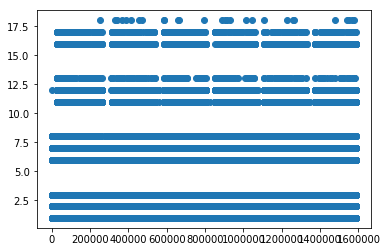

In [15]:
def intensityLabel(x):
    fa = 0
    se = 0
    sl = 0
    vh = 0
    pd = 0
    if x.Fatal > 0:
        fa = 10
    if x.Serious > 0:
        se = 5
    if x.Slight > 0:
        sl = 1
    if x.Number_of_Vehicles > 0:
        vh = 1
    if x.Pedestrian_Count > 0:
        pd = 1
    return fa + se + sl + vh + pd
    #return x.Fatal*9 + x.Serious*3 + x.Slight*1 + x.Number_of_Vehicles*1 + x.Pedestrian_Count

def categoryLabel(x):
    if x < 5:
        return 0
    elif x >= 5:
        return 1

nanRemovedDatasetTest['IntensityLabel'] = nanRemovedDatasetTest[['Fatal','Serious','Slight','Number_of_Vehicles','Pedestrian_Count']].apply(lambda x: intensityLabel(x), axis=1)
print(nanRemovedDatasetTest['IntensityLabel'].describe())
plt.scatter(nanRemovedDatasetTest.index,nanRemovedDatasetTest['IntensityLabel'])
plt.show()
nanRemovedDatasetTest['IntensityLabel'] = nanRemovedDatasetTest['IntensityLabel'].apply(lambda x: categoryLabel(x))

#### Class distribution of dependent variable

In [16]:
classDistribution = nanRemovedDatasetTest['IntensityLabel'].value_counts()
print(classDistribution)

0    1377391
1     125863
Name: IntensityLabel, dtype: int64


#### Undersampling to handle class imbalance

In [17]:
dataset = nanRemovedDatasetTest.sample(frac=1).reset_index(drop=True)
print('Least present class label: ',classDistribution.min())
zero = dataset[dataset['IntensityLabel']==0].tail(classDistribution.min())
print(zero.shape)
one = dataset[dataset['IntensityLabel']==1]
print(one.shape)
data = zero.append(one)
data=shuffle(data)
print('Shape of final dataset: ',data.shape)
del zero, one
data = data.sample(frac=1).reset_index(drop=True)
print('Columns in the dataset: ', len(data.columns))
print('Class imbalance evened out:')
print(data['IntensityLabel'].value_counts())

Least present class label:  125863
(125863, 45)
(125863, 45)
Shape of final dataset:  (251726, 45)
Columns in the dataset:  45
Class imbalance evened out:
1    125863
0    125863
Name: IntensityLabel, dtype: int64


#### Saving dataset to CSV file

In [18]:
modelDataTrain = data.copy(deep=True)

In [19]:
modelDataTrain.to_csv('BinarySeverity2010_2015.csv')

#### Loading dataset from the saved CSV file to assess class imbalance

In [20]:
modelDataTraining = pd.read_csv("BinarySeverity2010_2015.csv")
modelDataTraining['IntensityLabel'].value_counts()

1    125863
0    125863
Name: IntensityLabel, dtype: int64

#### Variables in the final dataset

In [21]:
list(modelDataTraining.columns)

['Unnamed: 0',
 'Vehicle_Reference',
 'Total Casualities',
 'Fatal',
 'Serious',
 'Slight',
 'Pedestrian_Count',
 'Vehicle_Type',
 'Towing_and_Articulation',
 'Vehicle_Manoeuvre',
 'Vehicle_Location-Restricted_Lane',
 'Junction_Location',
 'Skidding_and_Overturning',
 'Hit_Object_in_Carriageway',
 'Vehicle_Leaving_Carriageway',
 'Hit_Object_off_Carriageway',
 '1st_Point_of_Impact',
 'Vehicle_Left_Hand_Drive',
 'Journey_Purpose_of_Driver',
 'Sex_of_Driver',
 'Age_of_Driver',
 'Age_Band_of_Driver',
 'Longitude',
 'Latitude',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Day_of_Week',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 'Junction_Detail',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'LSOA_of_Accident_Location',
 'circleDistLL',
 'Month',
 'Hour

In [22]:
print('Overall execution took [', datetime.now() - startTime, '] seconds.')

Overall execution took [ 0:04:16.304657 ] seconds.
